<h1><center><strong><font color="chillipepper">Introduction à Pytorch</font></strong></center></h1>

<center>
Année 2024
</center>

------------------------


Dans ce laboratoire, vous utiliserez deux ensembles de données différents pour deux tâches (classification de séquences et classification de séquences en conversation). Vous apprendrez les bases de PyTorch et comment gérer deux tâches différentes, nécessitant des modèles spécifiques, la préparation des données, etc. Ces tâches sont uniquement multi-classes, ce qui signifie que le modèle prédira une classe parmi plus de 2 classes possibles.

Ainsi, vous allez également entraîner vos premiers modèles PyTorch et les évaluer.

# Tables de matières

- PyTorch Basics
  - Pre-trained Embeddings Imports
  - PyTorch Data Handling
  - PyTorch Basic Model


In [2]:
# ! pip install datasets
# ! pip install transformers
# ! pip install torchinfo
# !pip install nltk
# !pip install gensim
# !pip install termcolor

In [1]:
import torch
from tqdm import tqdm
import pandas as pd
from collections import Counter

# <font color="chillipepper">**Deep Learning in PyTorch image.png**</font>

## <font color="chillipepper">Pytorch</font>
PyTorch est une bibliothèque basée sur Python pour le calcul scientifique qui offre trois fonctionnalités principales :

Un tenseur n-dimensionnel, similaire à numpy mais pouvant fonctionner sur des GPU
Construire facilement de grands graphes computationnels pour l'apprentissage profond
Différentiation automatique pour calculer les gradients
Utilisations :

C'est un package de calcul scientifique basé sur Python destiné à deux types de publics :
Un remplacement de NumPy pour utiliser la puissance des GPU
Une plateforme de recherche en apprentissage profond qui offre une flexibilité et une vitesse maximales


___
<h1><center><font color="chillipepper">Pytorch basics</font></center></h1>

**NB** : Les tenseurs sont les blocs de base de PyTorch. Les tenseurs permettent de stocker des données (données d'entrée ou données cibles) ainsi que les paramètres (également appelés poids, neurones,...) de votre réseau de neurones.

- création de tenseurs
- types de tenseurs
- opérations de base entre les tenseurs
- de pytorch et vers numpy
- à propos du GPU

In [10]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

### <font color="chillipepper">Tensors</font>
(image by [Matthew Mayo](https://www.kdnuggets.com/author/matt-mayo))

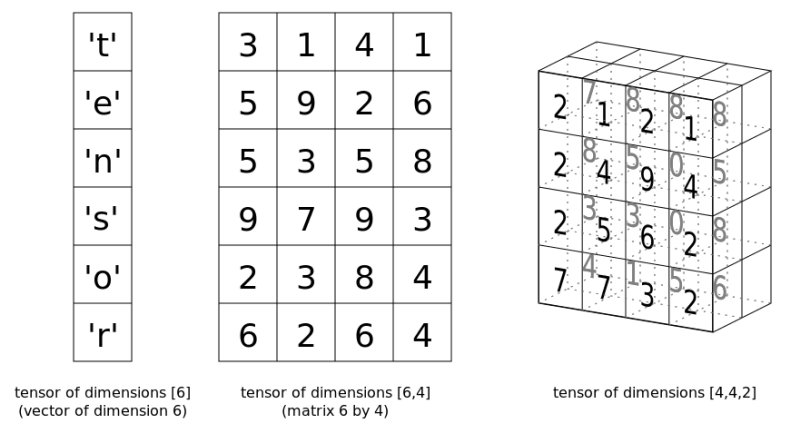

**Qu'est-ce qu'un tenseur PyTorch ?** : Un torch.Tensor est une matrice multi-dimensionnelle contenant des éléments d'un seul type de données.

Les tenseurs sont similaires aux ndarrays de NumPy, avec l'avantage supplémentaire que les tenseurs peuvent également être utilisés sur un GPU pour accélérer le calcul.

**Comment définir un tenseur PyTorch ?**

- en utilisant des constructeurs existants : torch.ones, torch.zeros, torch.rand
- basé sur un objet existant
- à partir d'un autre tenseur (ou en utilisant uniquement la forme de l'autre tenseur)
- à partir d'une liste Python
- à partir d'un tableau numpy

In [11]:
# define
ones = torch.ones(3,2)
# a tensor can be printed
print(ones)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [12]:
# other basic definition
print(torch.zeros(5,3), "\n",
      torch.rand(2,3), "\n",
      torch.empty(2,2))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([[0.4030, 0.1774, 0.7330],
        [0.9880, 0.1791, 0.3988]]) 
 tensor([[0., 0.],
        [0., 0.]])


In [13]:
# from a python list
ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4,-4]]]
tensor = torch.Tensor(ls)
print(tensor)
# from a numpy array :
array = np.array([0,1])
#array
tensor = torch.from_numpy(array)
print(tensor)
# symetrically  tensor.numpy()

tensor([[[ 1.,  3.,  5.,  6.],
         [-1.,  4.,  4.,  4.]],

        [[-1., -3., -5., -6.],
         [10., -4., -4., -4.]]])
tensor([0, 1])


**Manipulations Basiques**
- accéder au type / changer les types de données
- accéder aux éléments
- opérations mathématiques : additionner, multiplier, etc.
- différencier / dériver
- définir sur un device spécifique : GPU, GPU:0, GPU:1, CPU, etc.

In [14]:
# get type
print(tensor,tensor.dtype)
# change type
tensor = tensor.float()

tensor([0, 1]) torch.int64


**NB** : les types sont importants en deep learning car :

- certains types consomment plus de mémoire que d'autres : par exemple, float16 vs float32
- certaines opérations nécessitent un type spécifique (cf. couche d'Embedding ...)

In [15]:
tensor = torch.rand(5,2,2)
print(tensor)
# access one element
print(tensor[0,1,1])
# access several element
print(tensor[:3,0,:2])

tensor([[[0.8747, 0.1191],
         [0.9225, 0.1730]],

        [[0.3885, 0.5991],
         [0.1676, 0.6574]],

        [[0.9346, 0.6115],
         [0.8912, 0.3245]],

        [[0.9646, 0.5252],
         [0.3875, 0.8918]],

        [[0.4909, 0.8671],
         [0.5626, 0.8974]]])
tensor(0.1730)
tensor([[0.8747, 0.1191],
        [0.3885, 0.5991],
        [0.9346, 0.6115]])


**NB** : Le système d'indexation est le même que sur Numpy.

In [16]:
# get the shape of a tensor
tensor.size()
# reshape it
print(tensor, "\n",
      tensor.view(2,2,5))

tensor([[[0.8747, 0.1191],
         [0.9225, 0.1730]],

        [[0.3885, 0.5991],
         [0.1676, 0.6574]],

        [[0.9346, 0.6115],
         [0.8912, 0.3245]],

        [[0.9646, 0.5252],
         [0.3875, 0.8918]],

        [[0.4909, 0.8671],
         [0.5626, 0.8974]]]) 
 tensor([[[0.8747, 0.1191, 0.9225, 0.1730, 0.3885],
         [0.5991, 0.1676, 0.6574, 0.9346, 0.6115]],

        [[0.8912, 0.3245, 0.9646, 0.5252, 0.3875],
         [0.8918, 0.4909, 0.8671, 0.5626, 0.8974]]])


In [17]:
intTensor = torch.ones(3,2, dtype=torch.float32)
print(intTensor, intTensor.dtype)
intTensor.int()

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) torch.float32


tensor([[1, 1],
        [1, 1],
        [1, 1]], dtype=torch.int32)

### <font color="chillipepper">All operations on tensors</font>
- all reshape
- squeeze
- sum , prod
- max, norm ...

**❗Attention aux problèmes de Broadcasting ❗** si vos tenseurs n'ont pas la même taille. Comme dans le broadcasting de Numpy, certaines opérations ci-dessus peuvent diffuser, c'est-à-dire étendre, leur application à la taille du tenseur ciblé.

Une très bonne explication sur le broadcasting spécifique à PyTorch peut être trouvée ici : https://stackoverflow.com/questions/51371070/how-does-pytorch-broadcasting-work

Prenons le même exemple et reproduisons-le ici.



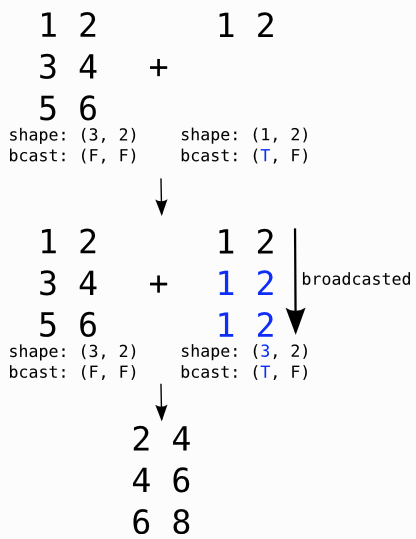

In PyTorch we reproduce it as follows:

In [19]:
tensor_a = torch.Tensor([[1,2], [3,4], [5,6]])
tensor_b = torch.Tensor([1,2])
tensor_a + tensor_b

tensor([[2., 4.],
        [4., 6.],
        [6., 8.]])

## <font color="chillipepper">Différentiation Automatique</font>

Le composant central de toute bibliothèque moderne d'apprentissage profond est la Différentiation Automatique.

**Rappel**

L'entraînement de tout modèle d'apprentissage profond nécessite la rétropropagation
La rétropropagation est un algorithme qui calcule efficacement le gradient de la sortie d'un réseau de neurones en fonction de son entrée et de tous ses paramètres (également appelés poids)
La Différentiation Automatique fournit un moyen de calculer automatiquement les gradients de toute fonction. En d'autres termes, la différentiation automatique vous permet de construire des réseaux de neurones complexes sans avoir à calculer les gradients vous-même.

**NB**

L'accès à une bibliothèque open source qui effectue la Différentiation Automatique (tensorflow/pytorch et auparavant Dynet ou Theano) est l'une des raisons de la popularité et du succès du deep learning aujourd'hui.

**Différentiation Automatique en bref**

Définition La différentiation automatique fait référence à une méthode générale qui consiste à prendre un programme qui calcule une valeur et à construire automatiquement une procédure pour calculer les dérivées de cette valeur.

La Différentiation Automatique nécessite 3 étapes :

1. Construire un graphe de calcul
2. Propager les entrées à travers le graphe (passage avant)
3. Calculer le gradient de chacun des nœuds du graphe (passage arrière)

In [2]:
x = torch.ones(2, 2, requires_grad=True)
# double checking if gradient
print("Checking gradient is set to {}. Its gradient is still {} ".format(x.requires_grad, x.grad))

Checking gradient is set to True. Its gradient is still None 


In [5]:
torch.ones(2, 2,)

tensor([[1., 1.],
        [1., 1.]])

In [4]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [3]:
# let us define a basic operation
y = x+1
print(y)

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)


In [6]:
# y has now a gradient attribute , grad is none
y.grad_fn, y.grad

/tmp/ipykernel_33685/1874857746.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  y.grad_fn, y.grad


(<AddBackward0 at 0x7e1f282fdc00>, None)

In [7]:
z = y * y * 3
out = z.mean()
print('z = ', z)
print('out = ', out)
print('z and y grad = ', z.grad, y.grad)

z =  tensor([[12., 12.],
        [12., 12.]], grad_fn=<MulBackward0>)
out =  tensor(12., grad_fn=<MeanBackward0>)
z and y grad =  None None


/tmp/ipykernel_33685/2403453142.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print('z and y grad = ', z.grad, y.grad)


In [8]:
x ,
y = x + 1
z = y*y*3
out = z.mean() # top de la pyramide de calcul

tensor([[5., 5.],
        [5., 5.]], grad_fn=<AddBackward0>)

In [10]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [9]:
out.backward() # backpropagation
# Let's inspect the gradient at each previous variable' gradients now
print("Gradients with regard to intermediate nodes:", out.grad, z.grad, y.grad)
print("Gradients with regard to the input node that we considered to be the parameter:", x.grad)

Gradients with regard to intermediate nodes: None None None
Gradients with regard to the input node that we considered to be the parameter: tensor([[3., 3.],
        [3., 3.]])


/tmp/ipykernel_33685/3927720886.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print("Gradients with regard to intermediate nodes:", out.grad, z.grad, y.grad)


In [11]:
out

tensor(12., grad_fn=<MeanBackward0>)

In [12]:
# to manipulate a tensor without its gradient
out.detach()

tensor(12.)

In [15]:
x = torch.ones(2, 2, requires_grad=True)
print('x', x)
y = x+1
print('y', y)
# y.grad_fn, y.grad
z = y * y * 3
print('z', z)
out = z.mean()
print('out', out)
print('x grad before backward', x.grad)
out.backward()
print('x grad after backward', x.grad, x.grad.data, x.grad_fn)
print('y grad', y.grad, y.grad_fn)
print('z grad', z.grad, z.grad_fn)
print('out grad', out.grad, out.grad_fn)



x tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
y tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
z tensor([[12., 12.],
        [12., 12.]], grad_fn=<MulBackward0>)
out tensor(12., grad_fn=<MeanBackward0>)
x grad before backward None
x grad after backward tensor([[3., 3.],
        [3., 3.]]) tensor([[3., 3.],
        [3., 3.]]) None
y grad None <AddBackward0 object at 0x7e1f29205930>
z grad None <MulBackward0 object at 0x7e1f29205930>
out grad None <MeanBackward0 object at 0x7e1f29205930>


/tmp/ipykernel_33685/883409825.py:13: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print('y grad', y.grad, y.grad_fn)
/tmp/ipykernel_33685/883409825.py:14: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pyto

In [16]:
import torch

# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
y = torch.tensor(2.0)
z = x * y

# Displaying
for i, name in zip([x, y, z], "xyz"):
    print(f"{name}\ndata: {i.data}\nrequires_grad: {i.requires_grad}\n\
    grad: {i.grad}\ngrad_fn: {i.grad_fn}\nis_leaf: {i.is_leaf}\n")

x
data: 1.0
requires_grad: True
    grad: None
grad_fn: None
is_leaf: True

y
data: 2.0
requires_grad: False
    grad: None
grad_fn: None
is_leaf: True

z
data: 2.0
requires_grad: True
    grad: None
grad_fn: <MulBackward0 object at 0x7e1f28344790>
is_leaf: False



/tmp/ipykernel_33685/3306691725.py:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  grad: {i.grad}\ngrad_fn: {i.grad_fn}\nis_leaf: {i.is_leaf}\n")


In [17]:
import torch
# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
z = x ** 3
z.backward() #Computes the gradient
print(x.grad.data) #Prints '3' which is dz/dx

tensor(3.)
